https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health

https://www.kaggle.com/code/gbiplesh/data-analysis-social-media-and-mental-health

#for exploratory data analytics ideas : 



https://www.kaggle.com/code/jens78/socmed-eda-and-mental-health-risk-prediction

https://www.kaggle.com/code/souvikahmed071/correlation-between-sm-and-mental-health



In [823]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import  MultiLabelBinarizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import (
                            accuracy_score, 
                             precision_score, recall_score, 
                             f1_score, confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report
                             )

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [824]:
df = pd.read_csv('dataset.csv')

In [825]:
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [826]:
df.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [827]:
df.shape

(481, 21)

## Data Preprocessing

## Handling Missing Values

In [828]:
df.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [829]:
#Removing missing value
df.dropna(axis = 0 , inplace = True)

In [830]:
df.isnull().sum()

Timestamp                                                                                                               0
1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
5. What type of organizations are you affiliated with?                                                                  0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                                                                     0
8. What is the average t

In [831]:
## Renaming above columns to make it more redable
renaming_columns = {
    'Timestamp': 'date',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliated_organizations',
    '6. Do you use social media?': 'use_social_media',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_social_media_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'frequency_social_media_distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility_scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level_scale',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_people_scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feelings_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
    '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation_scale',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues_scale',
}

df = df.rename(columns = renaming_columns)

In [832]:
df['compare_to_successful_people_scale']

0      2
1      5
2      3
3      5
4      3
      ..
476    4
477    4
478    3
479    2
480    3
Name: compare_to_successful_people_scale, Length: 451, dtype: int64

In [833]:
#dropping irrelevant columns 
df.drop(columns = ['date', 'affiliated_organizations','compare_to_successful_people_scale'], axis = 1, inplace=True)

In [834]:
df.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'social_media_platforms', 'daily_social_media_time',
       'frequency_social_media_no_purpose',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale'],
      dtype='object')

## Handling some categorical variables

In [835]:
df.dtypes

age                                  float64
gender                                object
relationship_status                   object
occupation_status                     object
use_social_media                      object
social_media_platforms                object
daily_social_media_time               object
frequency_social_media_no_purpose      int64
frequency_social_media_distracted      int64
restless_without_social_media          int64
distractibility_scale                  int64
worry_level_scale                      int64
difficulty_concentrating               int64
feelings_about_comparisons             int64
frequency_seeking_validation           int64
frequency_feeling_depressed            int64
interest_fluctuation_scale             int64
sleep_issues_scale                     int64
dtype: object

In [836]:
df.dtypes

age                                  float64
gender                                object
relationship_status                   object
occupation_status                     object
use_social_media                      object
social_media_platforms                object
daily_social_media_time               object
frequency_social_media_no_purpose      int64
frequency_social_media_distracted      int64
restless_without_social_media          int64
distractibility_scale                  int64
worry_level_scale                      int64
difficulty_concentrating               int64
feelings_about_comparisons             int64
frequency_seeking_validation           int64
frequency_feeling_depressed            int64
interest_fluctuation_scale             int64
sleep_issues_scale                     int64
dtype: object

## Preprocessing/cleaning for gender

## Note:: 
1. This code has some repeated value for Non-binary with some with a trailing space.So, updating this with identical data.
2. Also replacing unsure and There are others with with Non-binary as Non-binary fits the given categry

In [837]:
df['gender'].unique()

array(['Male', 'Female', 'Nonbinary ', 'Non-binary', 'unsure ',
       'Non binary ', 'There are others???'], dtype=object)

In [838]:
df_encoded = df.copy()

In [839]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,3,2,5,4,5
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,1,1,5,4,5
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,1,4,2,5
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,1,2,4,3,2
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,4,4,1


In [840]:
df_encoded['gender']  = df_encoded['gender'].replace(['Non binary ','Nonbinary ', 'unsure ', 'There are others???'],'Non-binary')

In [841]:
df_encoded['gender'].unique()

array(['Male', 'Female', 'Non-binary'], dtype=object)

In [842]:
# Handling categorical variables for gender
gender_mapping = {
    'Male': 0,
    'Female': 1,
    'Non-binary': 2
}
df_encoded['gender'] = df_encoded['gender'].map(gender_mapping)



In [843]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,0,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,3,2,5,4,5
1,21.0,1,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,1,1,5,4,5
2,21.0,1,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,1,4,2,5
3,21.0,1,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,1,2,4,3,2
4,21.0,1,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,4,4,1


In [844]:
df_encoded['occupation_status'].unique()

array(['University Student', 'Salaried Worker', 'School Student',
       'Retired'], dtype=object)

In [845]:
# Handling categorical variables for ocupation status
occupation_mapping = {
    'University Student': 0,
    'Salaried Worker': 1,
    'School Student': 2,
    'Retired': 3
}

df_encoded['occupation_status'] = df_encoded['occupation_status'].map(occupation_mapping)


In [846]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,0,In a relationship,0,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,3,2,5,4,5
1,21.0,1,Single,0,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,1,1,5,4,5
2,21.0,1,Single,0,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,1,4,2,5
3,21.0,1,Single,0,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,1,2,4,3,2
4,21.0,1,Single,0,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,4,4,1


In [847]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,3,2,5,4,5
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,1,1,5,4,5
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,1,4,2,5
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,1,2,4,3,2
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,4,4,1


## Handling categorical variable for relation_status

In [848]:
df_encoded['relationship_status'].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [849]:
df_encoded['relationship_status'] = df_encoded['relationship_status'].replace('In a relationship','Relationship')

In [850]:
df_encoded['relationship_status'].unique()

array(['Relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [851]:

# Handling for 
relationship_mapping = {
    'Single': 0,
    'Relationship': 1,
    'Married': 2,
    'Divorced': 3
}

df_encoded['relationship_status'] = df_encoded['relationship_status'].map(relationship_mapping)




In [852]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,0,1,0,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,3,2,5,4,5
1,21.0,1,0,0,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,1,1,5,4,5
2,21.0,1,0,0,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,1,4,2,5
3,21.0,1,0,0,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,1,2,4,3,2
4,21.0,1,0,0,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,4,4,1


## Exploratory Data analytics 

In [853]:
df.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'social_media_platforms', 'daily_social_media_time',
       'frequency_social_media_no_purpose',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale'],
      dtype='object')

## Finding outliers 

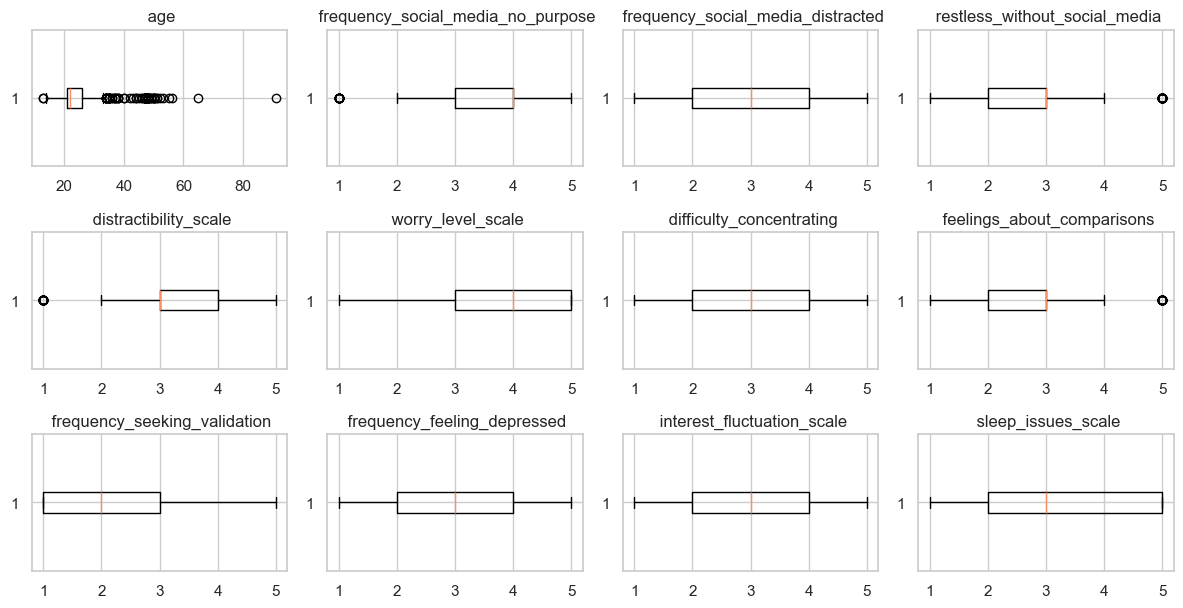

In [854]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f' {col}')

plt.tight_layout()
plt.show()

## Exploratory data analysis - EDA

In [855]:
df.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'social_media_platforms', 'daily_social_media_time',
       'frequency_social_media_no_purpose',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale'],
      dtype='object')

In [856]:
df['social_media_platforms']

0      Facebook, Twitter, Instagram, YouTube, Discord...
1      Facebook, Twitter, Instagram, YouTube, Discord...
2                Facebook, Instagram, YouTube, Pinterest
3                                    Facebook, Instagram
4                           Facebook, Instagram, YouTube
                             ...                        
476                         Facebook, Instagram, YouTube
477                                    Facebook, YouTube
478                                    Facebook, YouTube
479    Facebook, Twitter, Instagram, YouTube, Discord...
480                                    Facebook, YouTube
Name: social_media_platforms, Length: 451, dtype: object

### Age distribution of the users

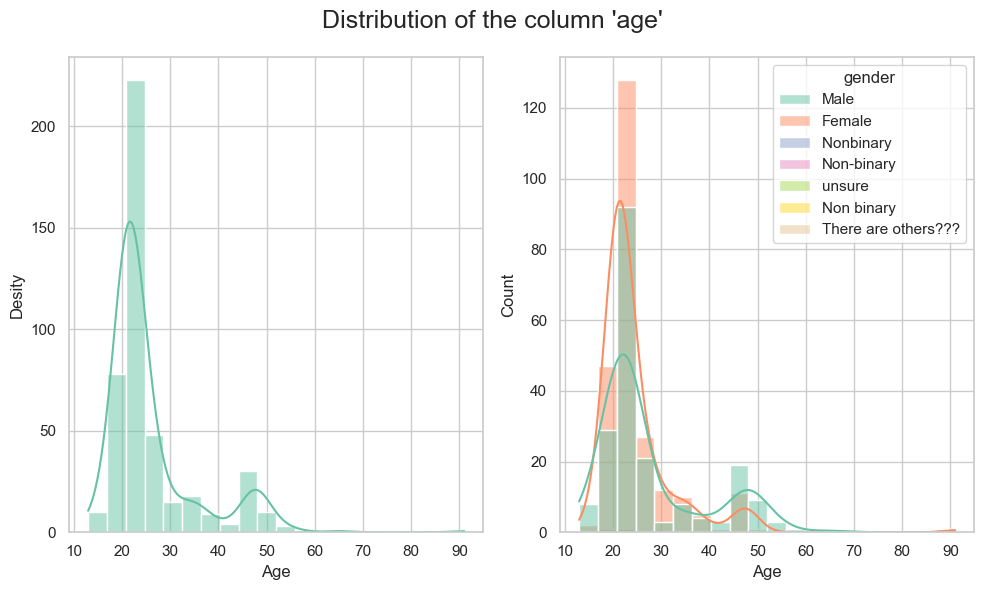

In [857]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.histplot(data=df, x="age", kde=True, bins=20, ax=ax[0])
sns.histplot(data=df, x="age", kde=True, bins=20, hue="gender", ax=ax[1])
fig.suptitle("Distribution of the column 'age'", fontsize=18)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Desity")
ax[1].set_xlabel("Age")
plt.tight_layout();

Most social media users are young, but there's also a clear second peak for users in their late 40s. Both men and women show this two-peaked pattern.

## Data distribution 

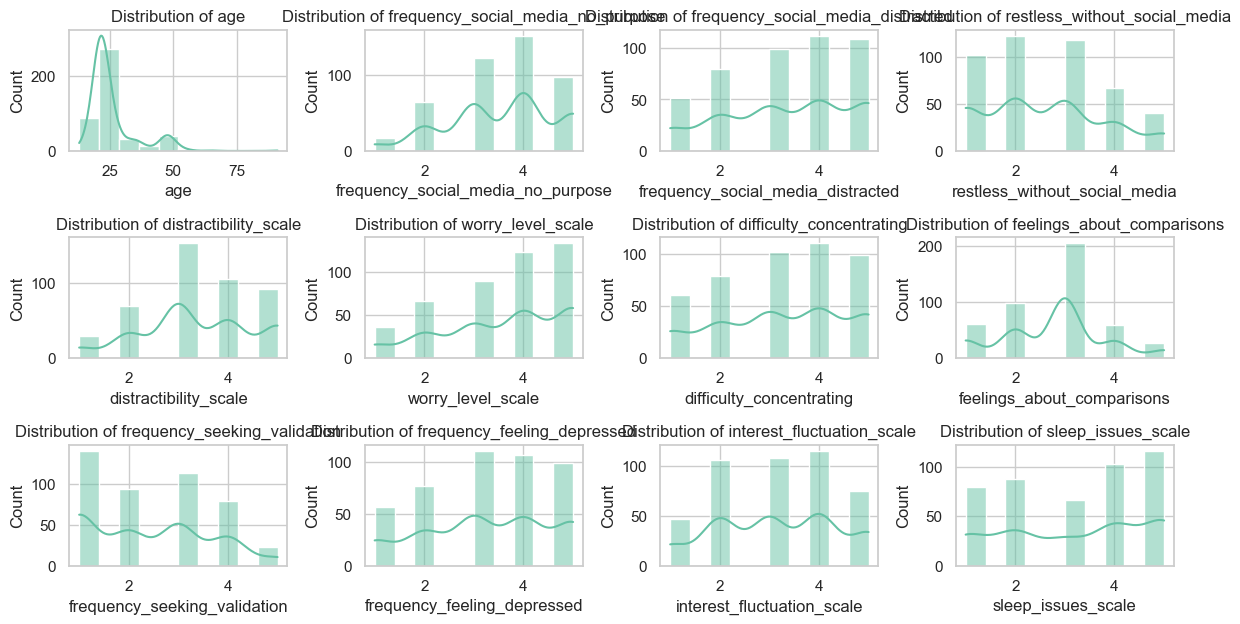

In [858]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes('number'), 1):# selecting numerical datatypes 
    plt.subplot(4, 4, i)
    sns.histplot(data = df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

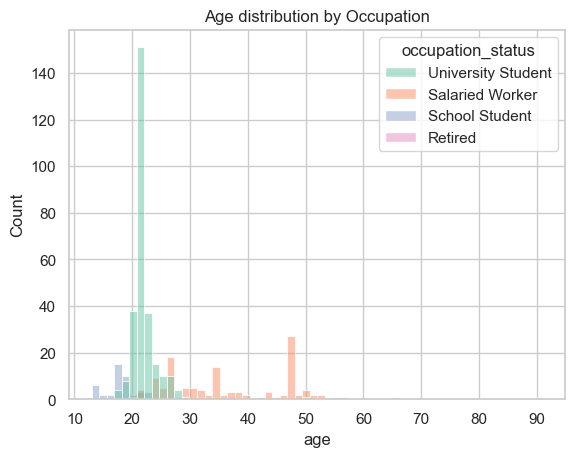

In [859]:
#Age vs occupation 
sns.histplot(df, x = 'age', hue = 'occupation_status')
plt.title("Age distribution by Occupation")
plt.show()

In [860]:
# sns.pairplot(df_encoded)

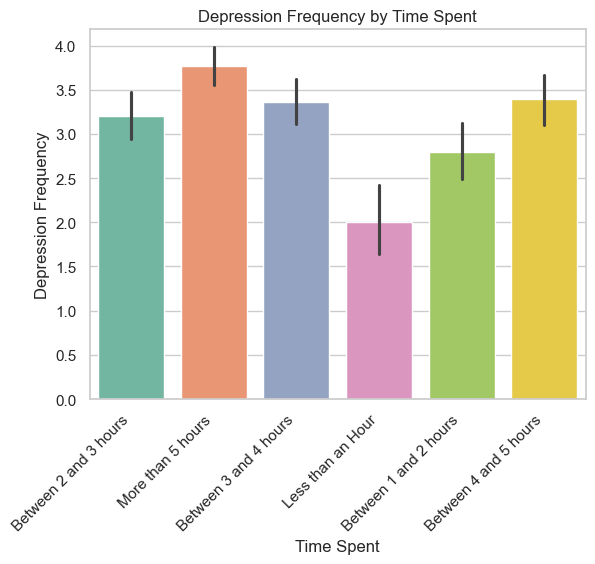

In [861]:

sns.barplot(df, x = 'daily_social_media_time', y = "frequency_feeling_depressed" ,hue = 'daily_social_media_time')
plt.title("Depression Frequency by Time Spent")
plt.xlabel("Time Spent")
plt.ylabel("Depression Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

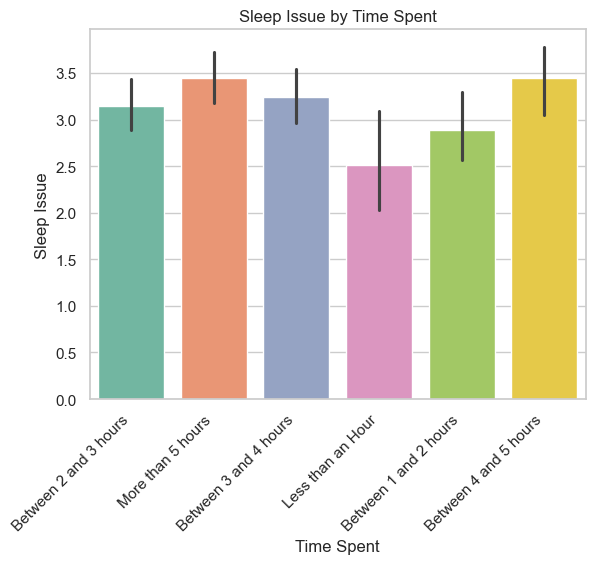

In [862]:
sns.barplot(df, x = 'daily_social_media_time', y = "sleep_issues_scale" ,hue = 'daily_social_media_time')
plt.title("Sleep Issue by Time Spent")
plt.xlabel("Time Spent")
plt.ylabel("Sleep Issue")
plt.xticks(rotation=45, ha='right')
plt.show()

## EDA for various platforms uses

In [863]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,3,2,5,4,5
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,1,1,5,4,5
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,1,4,2,5
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,1,2,4,3,2
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,4,4,1


### Reorganizing Social Paltforms(facebook , instagram, ...) data for better usages.
- i.e Handling categorical variables for Social media platforms

In [864]:

# MultiLabelBinarizer for 'social_media_platforms' (multi-selection)
mlb = MultiLabelBinarizer()
df['social_media_platforms_list'] = df['social_media_platforms'].str.split(', ')
platforms_encoded = mlb.fit_transform(df['social_media_platforms_list'])
df_social_media_platforms = pd.DataFrame(platforms_encoded, columns=mlb.classes_)
df = pd.concat([df, df_social_media_platforms], axis=1)

In [865]:
df_social_media_platforms.head()

,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,1,1,1,0,1,0,0,1,1
1,1,1,1,0,1,0,0,1,1
2,0,1,1,1,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,1


In [866]:
df.head(5)

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,...,social_media_platforms_list,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5.0,3.0,2.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4.0,3.0,2.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3.0,2.0,1.0,...,"[Facebook, Instagram, YouTube, Pinterest]",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4.0,2.0,1.0,...,"[Facebook, Instagram]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3.0,5.0,4.0,...,"[Facebook, Instagram, YouTube]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [867]:
df_social_media_platforms.columns

Index(['Discord', 'Facebook', 'Instagram', 'Pinterest', 'Reddit', 'Snapchat',
       'TikTok', 'Twitter', 'YouTube'],
      dtype='object')

In [868]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,...,social_media_platforms_list,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5.0,3.0,2.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4.0,3.0,2.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3.0,2.0,1.0,...,"[Facebook, Instagram, YouTube, Pinterest]",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4.0,2.0,1.0,...,"[Facebook, Instagram]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3.0,5.0,4.0,...,"[Facebook, Instagram, YouTube]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Filtering age based dataframe for analysis of relative usage per age group

In [869]:
df_20 = df.query("age <= 20")
df_21_30 = df.query("age > 20 & age <=30")
df_31_40 = df.query("age > 30 & age <=40")
df_40 = df.query("age > 40")

print(f"Age below 20: n={len(df_20)}")
print(f"Age 21 to 30: n={len(df_21_30)}")
print(f"Age 31 to 40: n={len(df_31_40)}")
print(f"Age above 40: n={len(df_40)}")

Age below 20: n=88
Age 21 to 30: n=281
Age 31 to 40: n=32
Age above 40: n=50


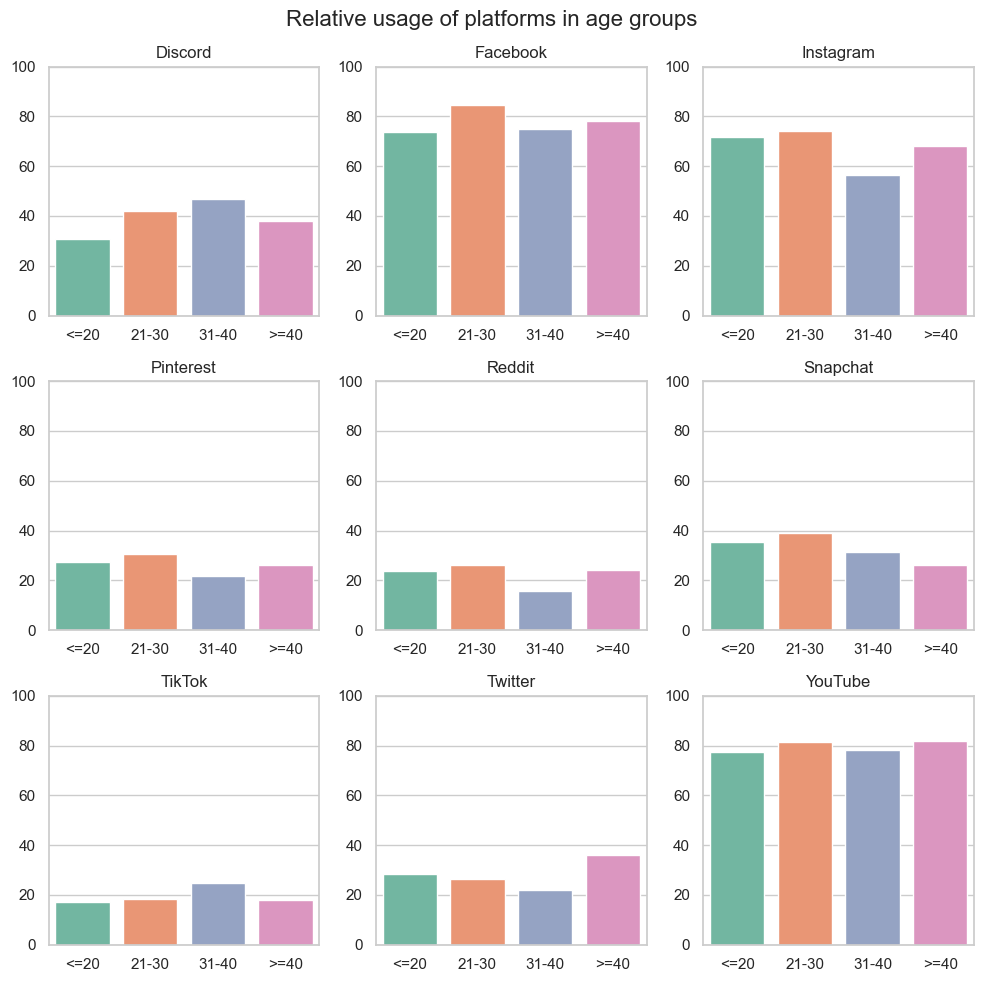

In [870]:
# Analysing relative values for different platforms 
sns.set_theme(style="whitegrid", palette="Set2")

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for ax, platform in zip(axes, df_social_media_platforms.columns):
    x_list = ["<=20", "21-30", "31-40", ">=40"]
    percent20 = df_20[platform].sum() / len(df_20) * 100
    percent2130 = df_21_30[platform].sum() / len(df_21_30) * 100
    percent3140 = df_31_40[platform].sum() / len(df_31_40) * 100
    percent40 = df_40[platform].sum() / len(df_40) * 100
    y_list = [percent20, percent2130, percent3140, percent40]
    
    # Pass x_list to hue and disable legend
    sns.barplot(x=x_list, y=y_list, hue=x_list, ax=ax, palette="Set2", dodge=False, legend=False)
    ax.set_ylim(0, 100)
    ax.set_title(platform)
    
 

fig.suptitle("Relative usage of platforms in age groups", fontsize=16)
plt.tight_layout()
plt.show()


## correlations between user behaviors (like usage frequency and self-comparison) and mental health indicators.

##  explored correlations among mental health-related questions (e.g., feeling down, sleep issues) and user demographic data.

## Handling categorical for whether user use social media or not

In [871]:
df_encoded['use_social_media'].unique()

array(['Yes', 'No'], dtype=object)

In [872]:
# Handling categorical variables for using social media or not
use_social_media_mapping = {
    'No' : 0,
    'Yes': 1
}
df_encoded['use_social_media'] = df_encoded['use_social_media'].map(use_social_media_mapping)

time_mapping = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 5.5
}

# Apply the mapping

df_encoded['daily_social_media_time'] = df_encoded['daily_social_media_time'].map(time_mapping)

In [873]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,0,1,0,1,"Facebook, Twitter, Instagram, YouTube, Discord...",2.5,5,3,2,5,2,5,3,2,5,4,5
1,21.0,1,0,0,1,"Facebook, Twitter, Instagram, YouTube, Discord...",5.5,4,3,2,4,5,4,1,1,5,4,5
2,21.0,1,0,0,1,"Facebook, Instagram, YouTube, Pinterest",3.5,3,2,1,2,5,4,3,1,4,2,5
3,21.0,1,0,0,1,"Facebook, Instagram",5.5,4,2,1,3,5,3,1,2,4,3,2
4,21.0,1,0,0,1,"Facebook, Instagram, YouTube",2.5,3,5,4,4,5,5,3,3,4,4,1


 ### scaling categorical variables (like relationship status, occupation status) and optimizing feature importance

In [874]:
# # correlation_matrix = df_encoded[['daily_social_media_time', 'frequency_feeling_depressed']].corr()
# plt.figure(figsize=(12,6))
# sns.heatmap(df_encoded, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap: Social Media Time vs Depression Level')
# plt.show()

## Feature engineering 

- Creating derived features(mental_risk) from other mental risk paramaters

In [875]:

risk_columns = [
    'worry_level_scale',
    'frequency_feeling_depressed',
    'sleep_issues_scale',
    'difficulty_concentrating',
    'distractibility_scale',
    'interest_fluctuation_scale',
    'frequency_seeking_validation',
    'feelings_about_comparisons'
]

# average risk score
df_encoded['mental_risk_score'] = df_encoded[risk_columns].mean(axis=1)

# Binarize the risk score: high risk (1) if above median, low risk (0) otherwise
threshold = df_encoded['mental_risk_score'].median()
df_encoded['mental_risk'] = (df_encoded['mental_risk_score'] > threshold).astype(int)

In [876]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale,mental_risk_score,mental_risk
0,21.0,0,1,0,1,"Facebook, Twitter, Instagram, YouTube, Discord...",2.5,5,3,2,5,2,5,3,2,5,4,5,3.875,1
1,21.0,1,0,0,1,"Facebook, Twitter, Instagram, YouTube, Discord...",5.5,4,3,2,4,5,4,1,1,5,4,5,3.625,1
2,21.0,1,0,0,1,"Facebook, Instagram, YouTube, Pinterest",3.5,3,2,1,2,5,4,3,1,4,2,5,3.250,0
3,21.0,1,0,0,1,"Facebook, Instagram",5.5,4,2,1,3,5,3,1,2,4,3,2,2.875,0
4,21.0,1,0,0,1,"Facebook, Instagram, YouTube",2.5,3,5,4,4,5,5,3,3,4,4,1,3.625,1


In [877]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,...,social_media_platforms_list,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5.0,3.0,2.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4.0,3.0,2.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3.0,2.0,1.0,...,"[Facebook, Instagram, YouTube, Pinterest]",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4.0,2.0,1.0,...,"[Facebook, Instagram]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3.0,5.0,4.0,...,"[Facebook, Instagram, YouTube]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Building

In [878]:
df_encoded.drop(columns=['social_media_platforms'],inplace=True)
df_encoded = pd.concat([df_encoded, df_social_media_platforms], axis=1)

In [879]:
df_encoded.isnull().sum()

age                                  28
gender                               28
relationship_status                  28
occupation_status                    28
use_social_media                     28
daily_social_media_time              28
frequency_social_media_no_purpose    28
frequency_social_media_distracted    28
restless_without_social_media        28
distractibility_scale                28
worry_level_scale                    28
difficulty_concentrating             28
feelings_about_comparisons           28
frequency_seeking_validation         28
frequency_feeling_depressed          28
interest_fluctuation_scale           28
sleep_issues_scale                   28
mental_risk_score                    28
mental_risk                          28
Discord                              28
Facebook                             28
Instagram                            28
Pinterest                            28
Reddit                               28
Snapchat                             28


In [880]:
df_encoded.dropna(inplace = True)


In [881]:
df_encoded.isnull().sum()

age                                  0
gender                               0
relationship_status                  0
occupation_status                    0
use_social_media                     0
daily_social_media_time              0
frequency_social_media_no_purpose    0
frequency_social_media_distracted    0
restless_without_social_media        0
distractibility_scale                0
worry_level_scale                    0
difficulty_concentrating             0
feelings_about_comparisons           0
frequency_seeking_validation         0
frequency_feeling_depressed          0
interest_fluctuation_scale           0
sleep_issues_scale                   0
mental_risk_score                    0
mental_risk                          0
Discord                              0
Facebook                             0
Instagram                            0
Pinterest                            0
Reddit                               0
Snapchat                             0
TikTok                   

In [ ]:
# Define the target variable (binary classification: 1 if score >= 4, else 0)
# df_encoded['target_depressed'] = (df_encoded["frequency_feeling_depressed"] >= 4).astype(int)

# X = df_encoded.drop('target_depressed', axis=1)
# y = df_encoded['target_depressed']
# X = df_encoded.drop('frequency_feeling_depressed', axis=1)

In [906]:
X = df_encoded.drop('mental_risk', axis=1)
y = df_encoded['mental_risk']#target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [907]:
X_train

,age,gender,relationship_status,occupation_status,use_social_media,daily_social_media_time,frequency_social_media_no_purpose,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,...,mental_risk_score,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
143,46.0,0.0,3.0,1.0,1.0,0.5,3.0,1.0,1.0,1.0,...,2.250,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
33,18.0,1.0,0.0,2.0,1.0,2.5,4.0,3.0,3.0,3.0,...,3.000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
93,17.0,2.0,0.0,2.0,1.0,4.5,4.0,4.0,3.0,4.0,...,3.125,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
311,22.0,0.0,0.0,0.0,1.0,5.5,5.0,3.0,2.0,3.0,...,3.625,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
400,19.0,0.0,0.0,0.0,1.0,3.5,4.0,2.0,3.0,3.0,...,3.125,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,18.0,1.0,0.0,0.0,1.0,3.5,4.0,3.0,3.0,3.0,...,4.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
117,22.0,1.0,0.0,0.0,1.0,5.5,5.0,4.0,5.0,4.0,...,3.750,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
291,25.0,1.0,1.0,0.0,1.0,3.5,3.0,2.0,1.0,2.0,...,2.875,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
372,23.0,1.0,0.0,0.0,1.0,0.5,3.0,2.0,1.0,1.0,...,2.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [908]:
y_test

157    0.0
301    1.0
190    0.0
438    0.0
447    1.0
      ... 
61     1.0
442    0.0
26     1.0
18     0.0
72     1.0
Name: mental_risk, Length: 85, dtype: float64

In [919]:
#constructing logistic regression model 
lr_model = LogisticRegression(max_iter=1000)

#fitting model to the training data 
model = lr_model.fit(X_train,y_train)
model

LogisticRegression(max_iter=1000)

In [910]:
y_pred = model.predict(X_test)
y_pred

array([0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.])

In [911]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred,average='weighted'))
print("Recall:", "%.6f" % recall_score(y_test, y_pred,average='weighted'))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.976471
Precision: 0.976471
Recall: 0.976471
F1 Score: 0.976471


In [912]:
# Instantiate model
decision_tree_tuned = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
# scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
decision_tree_grid = GridSearchCV(decision_tree_tuned, cv_params, scoring='f1_macro', cv=4, )
# I am changing scoring to f1_macro instead of f1 because target variable is multiclass,

In [913]:
decision_tree_grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             scoring='f1_macro')

In [914]:
y_tuned_pred = decision_tree_grid.predict(X_test)

In [915]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_tuned_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_tuned_pred,average='weighted'))
print("Recall:", "%.6f" % recall_score(y_test, y_tuned_pred,average='weighted'))
print("F1 Score:", "%.6f" % f1_score(y_test, y_tuned_pred,average='weighted'))

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 Score: 1.000000


In [916]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=decision_tree_tuned.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=decision_tree_tuned.classes_)

log_disp.plot(values_format='')
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'classes_'

In [ ]:
# classifiers = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
# }

In [ ]:

# # Model evaluation 
# results = {}
# for name, clf in classifiers.items():
#     clf.fit(X, y)
#     y_pred = clf.predict(X)
#     results[name] = {
#         'Accuracy': clf.score(X, y),
#         'Precision': precision_score(y, y_pred),
#         'Recall': recall_score(y, y_pred),
#         'F1 Score': f1_score(y, y_pred)
#     }

# results_df = pd.DataFrame(results).T

# results_df

## Plotting confusiton matrix to visualize how it perform on test data

In [ ]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');